c:\Users\Lyakhovoy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


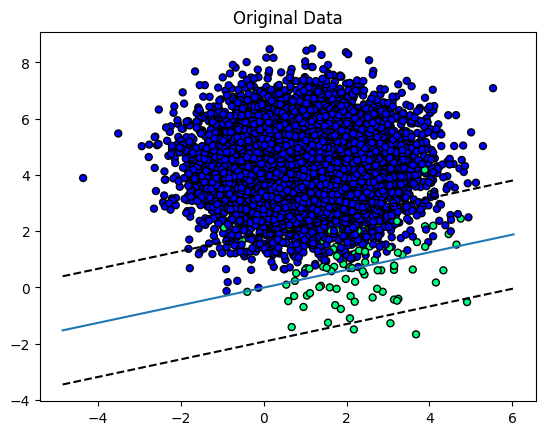

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 10 10:01:38 2021

@author: carolynphelan
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

#X1, Y1 = make_classification(n_samples=1000,
 #   n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, weights=[0.9],random_state=0)

# Define the number of samples in each class
SampleSplit=[9900, 100]
# Create the blobs for classification
X1, Y1 = make_blobs(n_samples=SampleSplit, 
                  random_state=0, cluster_std=1.2)

plt.close("all")
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k", cmap="winter")
plt.title("Original Data")

# SVM with original data 

Y1[Y1 == 0] = -1
# Change the labels to float64 rather than integer
tmp = np.ones(len(X1))
Y1 = tmp * Y1
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, random_state=0)
svc = LinearSVC()
svc.fit(X1_train, Y1_train)
plt.figure(1)
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
Y1_pred = svc.predict(X1_test)






In [4]:
confusion_matrix(Y1_test, Y1_pred)

array([[2475,    0],
       [  14,   11]], dtype=int64)

In [5]:
precision_recall_fscore_support(Y1_test, Y1_pred)

(array([0.99437525, 1.        ]),
 array([1.  , 0.44]),
 array([0.99717969, 0.61111111]),
 array([2475,   25], dtype=int64))

c:\Users\Lyakhovoy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


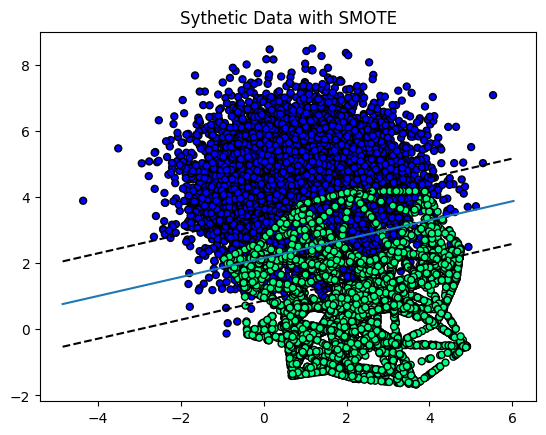

In [6]:
sm = SMOTE(sampling_strategy=1, random_state=0,k_neighbors=8)
X2, Y2 = sm.fit_resample(X1, Y1)
plt.figure(2)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k", cmap="winter")
plt.title("Sythetic Data with SMOTE")

# SVM with SMOTE
Y2[Y2 == 0] = -1
# Change the labels to float64 rather than integer
tmp = np.ones(len(X2))
Y2 = tmp * Y2
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, random_state=0)
svc = LinearSVC()
svc.fit(X2_train, Y2_train)
plt.figure(2)
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
Y2_pred = svc.predict(X2_test)



In [7]:
confusion_matrix(Y2_test, Y2_pred)

array([[2304,  157],
       [ 130, 2359]], dtype=int64)

In [8]:
precision_recall_fscore_support(Y2_test, Y2_pred)

(array([0.94658998, 0.93759936]),
 array([0.93620479, 0.94777019]),
 array([0.94136874, 0.94265734]),
 array([2461, 2489], dtype=int64))

c:\Users\Lyakhovoy\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


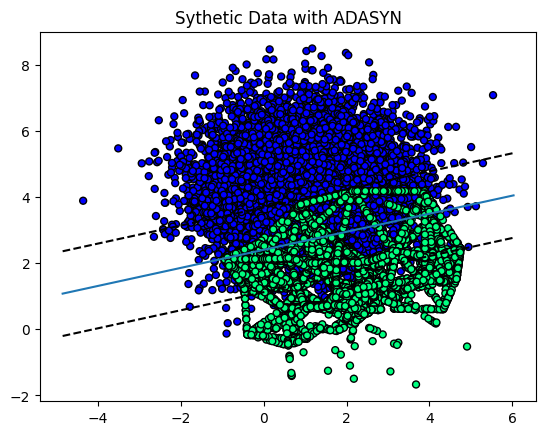

In [9]:
ada = ADASYN(random_state=0,n_neighbors=8)
X3, Y3 = ada.fit_resample(X1, Y1)

plt.figure(3)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k", cmap="winter")
plt.title("Sythetic Data with ADASYN")

# SVM with ADASYN
Y3[Y3 == 0] = -1
# Change the labels to float64 rather than integer
tmp = np.ones(len(X3))
Y3 = tmp * Y3
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, random_state=0)
svc = LinearSVC()
svc.fit(X3_train, Y3_train)
plt.figure(3)
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')
Y3_pred = svc.predict(X3_test)



In [10]:
confusion_matrix(Y3_test, Y3_pred)

array([[2256,  209],
       [ 175, 2312]], dtype=int64)

In [11]:
precision_recall_fscore_support(Y3_test, Y3_pred)

(array([0.92801316, 0.91709639]),
 array([0.91521298, 0.9296341 ]),
 array([0.92156863, 0.92332268]),
 array([2465, 2487], dtype=int64))